In [4]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("Research_Data - Sheet1.csv", delimiter=',')

## Описание данных:

years - год
resource mining - среднемесячная номинальная заработная плата сотрудников отрасли "Добыча ресурсов" в Российской Федерации в рублях  
manufacturing of vehicles and equipment - среднемесячная номинальная заработная плата сотрудников отрасли "Производство траспортных средств и оборудования" в Российской Федерации в рублях  
finance - среднемесячная номинальная заработная плата сотрудников отрасли "Финансовые услуги" в Российской Федерации в рублях 
inflation - инфляция в %

df.sample(10)

## Иccледование данных

Размер датасета

In [6]:
df.shape

(24, 5)

Информация о типах данных и пропусках

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    24 non-null     int64  
 1   resource_mining         24 non-null     int64  
 2   vehicles_manufacturing  24 non-null     int64  
 3   finance                 24 non-null     int64  
 4   inflation               24 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 1.1 KB


Примечание: пропуск данных (NaN) отсутствует

In [8]:
df.describe()

,year,resource_mining,vehicles_manufacturing,finance,inflation
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,53068.041667,27594.541667,63135.583333,9.644583
std,7.071068,36175.426958,18995.443925,44909.098785,4.536459
min,2000.000000,5940.000000,2454.000000,5232.000000,2.520000
25%,2005.750000,22290.500000,10917.500000,26530.500000,6.362500
50%,2011.500000,47766.500000,26081.500000,57394.000000,8.900000
75%,2017.250000,76650.000000,40206.000000,86445.500000,11.937500
max,2023.000000,130826.000000,70376.000000,169106.000000,20.200000


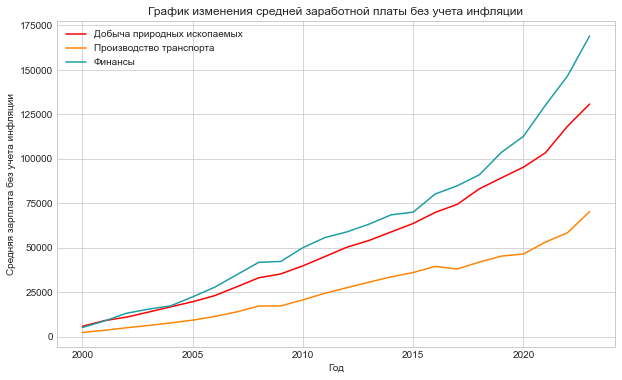

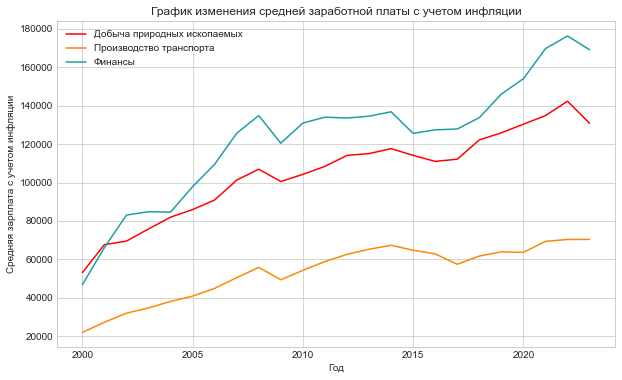

<Figure size 720x432 with 0 Axes>

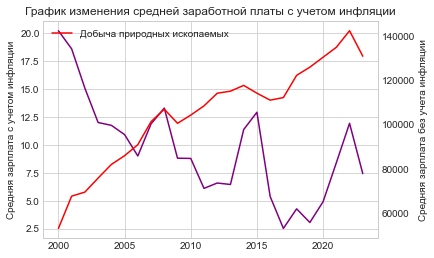

<Figure size 720x432 with 0 Axes>

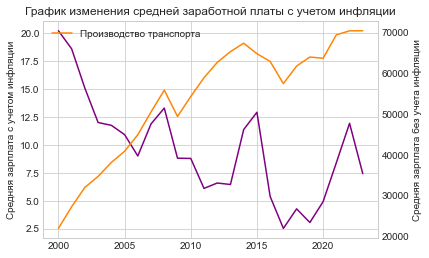

<Figure size 720x432 with 0 Axes>

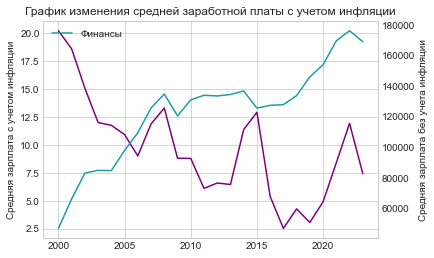

In [43]:
import pandas as pd
import numpy as np
import scipy.stats as sp
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')


class DataCalculation:
    def __init__(self, file_name, **kw_arguments):
        self.file_name = file_name
        self.data_frame = pd.read_csv(file_name, delimiter=',')
        self.salaries_average = {}
        self.salaries_adjusted = {}
        self.inflation = []
        self.year = []
        self.title_adjusted = kw_arguments.get('title_adjusted')
        self.title_average = kw_arguments.get('title_average')
        self.x_label = kw_arguments.get('x_label')
        self.y_label_adjusted = kw_arguments.get('y_label_adjusted')
        self.y_label_average = kw_arguments.get('y_label_average')
        self.y_label_inflation = kw_arguments.get('y_label_average')
        self.industries_configs = kw_arguments.get('industries_configs')
        self.recalculation()
        self.calculate_salary_with_inflation()
        
        
    def recalculation(self):
        self.inflation = self.data_frame.inflation
        self.year = self.data_frame.year
        
        for industry_config in self.industries_configs:
            frame_column_data = self.data_frame[industry_config['industry_name']]
            self.salaries_average[industry_config['industry_name']] = np.array(frame_column_data)
        
    def calculate_salary_with_inflation(self):
        
        for industry_config in self.industries_configs:
            industry_name = industry_config['industry_name']
            self.salaries_adjusted[industry_name] = []
            for i in range(0, len(self.salaries_average[industry_name])):
                salary_coef = 1.0
                if i != len(self.salaries_average[industry_name]) - 1:
                    for n in range(i, len(self.inflation)):
                        salary_coef *= (1 + (float(self.inflation[n]) / 100.0))

                self.salaries_adjusted[industry_name].append(float(self.salaries_average[industry_name][i] * salary_coef))
                
        
   
    
    
    def plot_display_average(self):
        plt.figure(figsize=(10, 6))
      
        for industry_config in self.industries_configs:
            industry_name = industry_config['industry_name']
            salaries_average = self.salaries_average[industry_name]
            industry_legend = industry_config['legend']
            industry_color = industry_config['color']
            plt.plot(self.year, salaries_average, label=industry_legend, color=industry_color)

        
        plt.title(self.title_average)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label_average)
        
        
        plt.legend()
        plt.show()
        
        
    def plot_display_adjusted(self):
        plt.figure(figsize=(10, 6))
        for industry_config in self.industries_configs:
            industry_name = industry_config['industry_name']
            salaries_adjusted = self.salaries_adjusted[industry_name]
            industry_legend = industry_config['legend']
            industry_color = industry_config['color']
            plt.plot(self.year, salaries_adjusted, label=industry_legend, color=industry_color)

        
        plt.title(self.title_adjusted)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label_adjusted)
        
        
        plt.legend()
        plt.show() 
        
    
    def inflation_salary_graph(self, industry_name):
        plt.figure(figsize=(10, 6))

        plot_industry_config = next((item for item in self.industries_configs if item["industry_name"] == industry_name), None)

        industry_name = plot_industry_config['industry_name']
        salaries_adjusted = self.salaries_adjusted[industry_name]
        inflation=self.salaries_average[industry_name]
        industry_legend = plot_industry_config['legend']
        industry_color = plot_industry_config['color']

        fig, ax = plt.subplots()
        ax1 = ax.twinx()
        ax.plot(self.year, self.inflation, label='inflation', color='purple')
        ax1.plot(self.year, salaries_adjusted, label=industry_legend, color=industry_color)

        ax.set_title(self.title_adjusted)
        ax.set_ylabel(self.y_label_adjusted)
        ax1.set_ylabel(self.y_label_inflation)
        
        plt.grid(False)
        plt.legend()
        plt.show()     
    
    
    def scatter_plot(self,industry_name):
        plot_industry_config = next((item for item in self.industries_configs if item["industry_name"] == industry_name), None)

        industry_name = plot_industry_config['industry_name']
        salaries_adjusted = self.salaries_adjusted[industry_name]
        inflation=self.salaries_average[industry_name]
        industry_legend = plot_industry_config['legend']
        industry_color = plot_industry_config['color']
        plt.scatter(self.inflation,salaries_adjusted,color=industry_color);
        plt.xlabel(industry_legend);
        plt.ylabel('inflation');
        plt.show() 
    
    def correlation_coef(self,industry_name):
        plot_industry_config = next((item for item in self.industries_configs if item["industry_name"] == industry_name), None)

        industry_name = plot_industry_config['industry_name']
        salaries_adjusted = self.salaries_adjusted[industry_name]
        inflation=self.salaries_average[industry_name]
        
        coef_piersona=np.corrcoef(salaries_adjusted,inflation)[0][1]
        coef_spearman=np.corrcoef(salaries_adjusted,inflation,'Spearman')[0][1]
        print(f'Коэффициент Пирсона для индустрии {industry_name}: {coef_piersona} ')
        print(f'Коэффициент Спирмана для индустрии {industry_name}: {coef_spearman} ')
        
        
        
    
salary_calculator = DataCalculation(
    "Research_Data - Sheet1.csv", 
    industries_configs=[
        {
            'industry_name': 'resource_mining',
            'color': 'red',
            'legend': 'Добыча природных ископаемых'
        },
         {
            'industry_name': 'vehicles_manufacturing',
            'color': '#ff8502',
            'legend': 'Производство транспорта'
        },
         {
            'industry_name': 'finance',
            'color': '#1d9da6',
            'legend': 'Финансы'
        }
    ],
    
    title_adjusted = 'Грaфик изменения средней заработной платы с учетом инфляции', 
    title_average = 'Грaфик изменения средней заработной платы без учета инфляции',
    x_label = 'Год',
    y_label_adjusted = 'Средняя зарплата с учетом инфляции',
    y_label_average = 'Средняя зарплата без учета инфляции',
    y_label_inflation = 'Инфляция'

)


salary_calculator.plot_display_average()

salary_calculator.plot_display_adjusted()

salary_calculator.inflation_salary_graph('resource_mining')

salary_calculator.inflation_salary_graph('vehicles_manufacturing')

salary_calculator.inflation_salary_graph('finance')


In [ ]:
Из графиков выше видно как пиковые значения средних зарплат и инфляции накладываются друг на друга.

Построим график для оценки корреляции средних зараплат в индустриях и инфляции

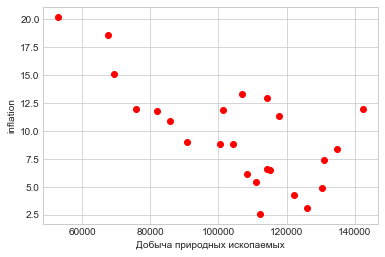

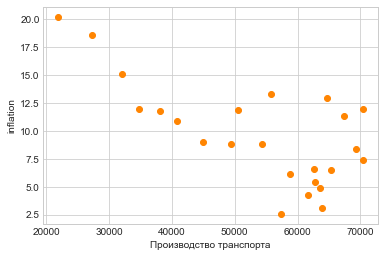

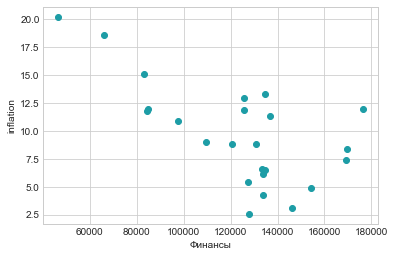

In [34]:
salary_calculator.scatter_plot('resource_mining')

salary_calculator.scatter_plot('vehicles_manufacturing')

salary_calculator.scatter_plot('finance')

### Вывод: 
Видна зависимость корреляции реальных зарплат и инфляции.
    
Для проверки вычислим коэффициенты корреляции.

In [42]:
salary_calculator.correlation_coef('resource_mining')
salary_calculator.correlation_coef('vehicles_manufacturing')
salary_calculator.correlation_coef('finance')

Коэффициент Пирсона для индустрии resource_mining: 0.9107705539063763 
Коэффициент Спирмана для индустрии resource_mining: 0.9107705539063763 
Коэффициент Пирсона для индустрии vehicles_manufacturing: 0.8792501762496199 
Коэффициент Спирмана для индустрии vehicles_manufacturing: 0.8792501762496199 
Коэффициент Пирсона для индустрии finance: 0.8870921317249183 
Коэффициент Спирмана для индустрии finance: 0.8870921317249183 


## Вывод
Реальные зарплаты коррелируют с инфляцией.